# Multiplt linear Regression
>**task** : pradict the petrol consumtion

>**input** : tax, distance of highways, average incom and population with driveing licens

>**output** : expected petrol consumtion


In [1]:
import pandas as pd
import numpy as np

In [3]:
ds = pd.read_csv('w1_petrol_consumption-220925-152435.csv')

In [4]:
ds.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
ds.shape

(48, 5)

In [13]:
ds.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.6683,0.9508,5.000,7.0000,7.5000,8.1250,10.000
Average_income,48.0,4241.8333,573.6238,3063.000,3739.0000,4298.0000,4578.7500,5342.000
Paved_Highways,48.0,5565.4167,3491.5072,431.000,3110.2500,4735.5000,7156.0000,17782.000
Population_Driver_licence(%),48.0,0.5703,0.0555,0.451,0.5298,0.5645,0.5952,0.724
Petrol_Consumption,48.0,576.7708,111.8858,344.000,509.5000,568.5000,632.7500,968.000


indentify the outlires

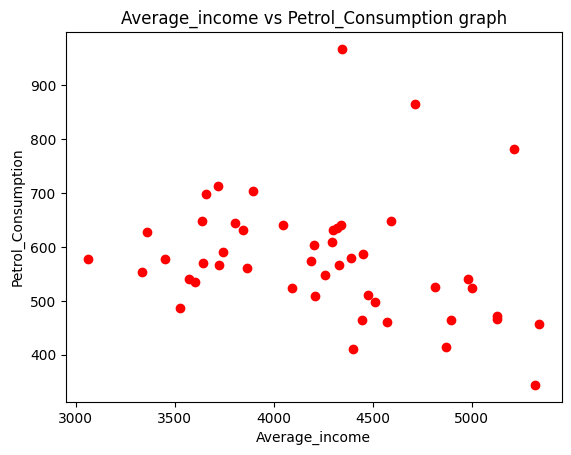

In [11]:
import matplotlib.pyplot as plt
plt.plot(ds['Average_income'],ds['Petrol_Consumption'],'ro')
plt.title('Average_income vs Petrol_Consumption graph');
plt.xlabel('Average_income');
plt.ylabel("Petrol_Consumption");

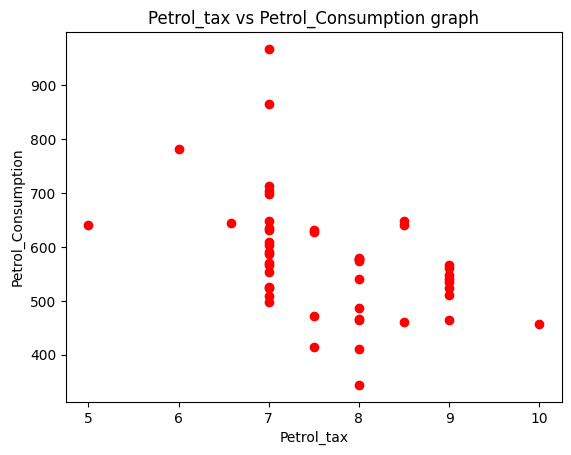

In [12]:
import matplotlib.pyplot as plt
plt.plot(ds['Petrol_tax'],ds['Petrol_Consumption'],'ro')
plt.title('Petrol_tax vs Petrol_Consumption graph');
plt.xlabel('Petrol_tax');
plt.ylabel("Petrol_Consumption");

## Model Training

In [15]:
y = ds['Petrol_Consumption']
x = ds[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [20]:
model.intercept_

361.45087906668397

# Make pradiction

In [21]:
y_prdict = model.predict(x_test)

In [22]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_prdict})
print(result)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


# Model evaluvation

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,y_prdict)
MAE = mean_absolute_error(y_test,y_prdict)
R2 = r2_score(y_test,y_prdict)

print('MSE :',MSE)
print('MAE :',MAE)
print('R2 :',R2)

MSE : 4083.2558717442635
MAE : 53.46854128290797
R2 : 0.39136640014305457


In [24]:
model.score(x_train,y_train)

0.7068781342155135

In [25]:
model.score(x_test,y_test)

0.39136640014305457